In [1]:
#1 ) Pandas read in CSV file
import pandas as pandas
import numpy as np
import somoclu #Self organizing map on a cluster
import matplotlib.pyplot as plt

#! pwd #Prints working directory
directory = ''
filename = 'numbers.csv'
seperator = ','
header_row_number = None
label_column_number = 0;

dataframe = pandas.read_csv(directory + filename,
                            sep=seperator,
                            header=header_row_number,
                            index_col=label_column_number)

In [2]:
#2 ) Organize dataset

# Drops column if all rows have NA for this column
dataframe = dataframe.dropna(1,'all')
labels = dataframe.index.astype(str);
data = dataframe.to_numpy()

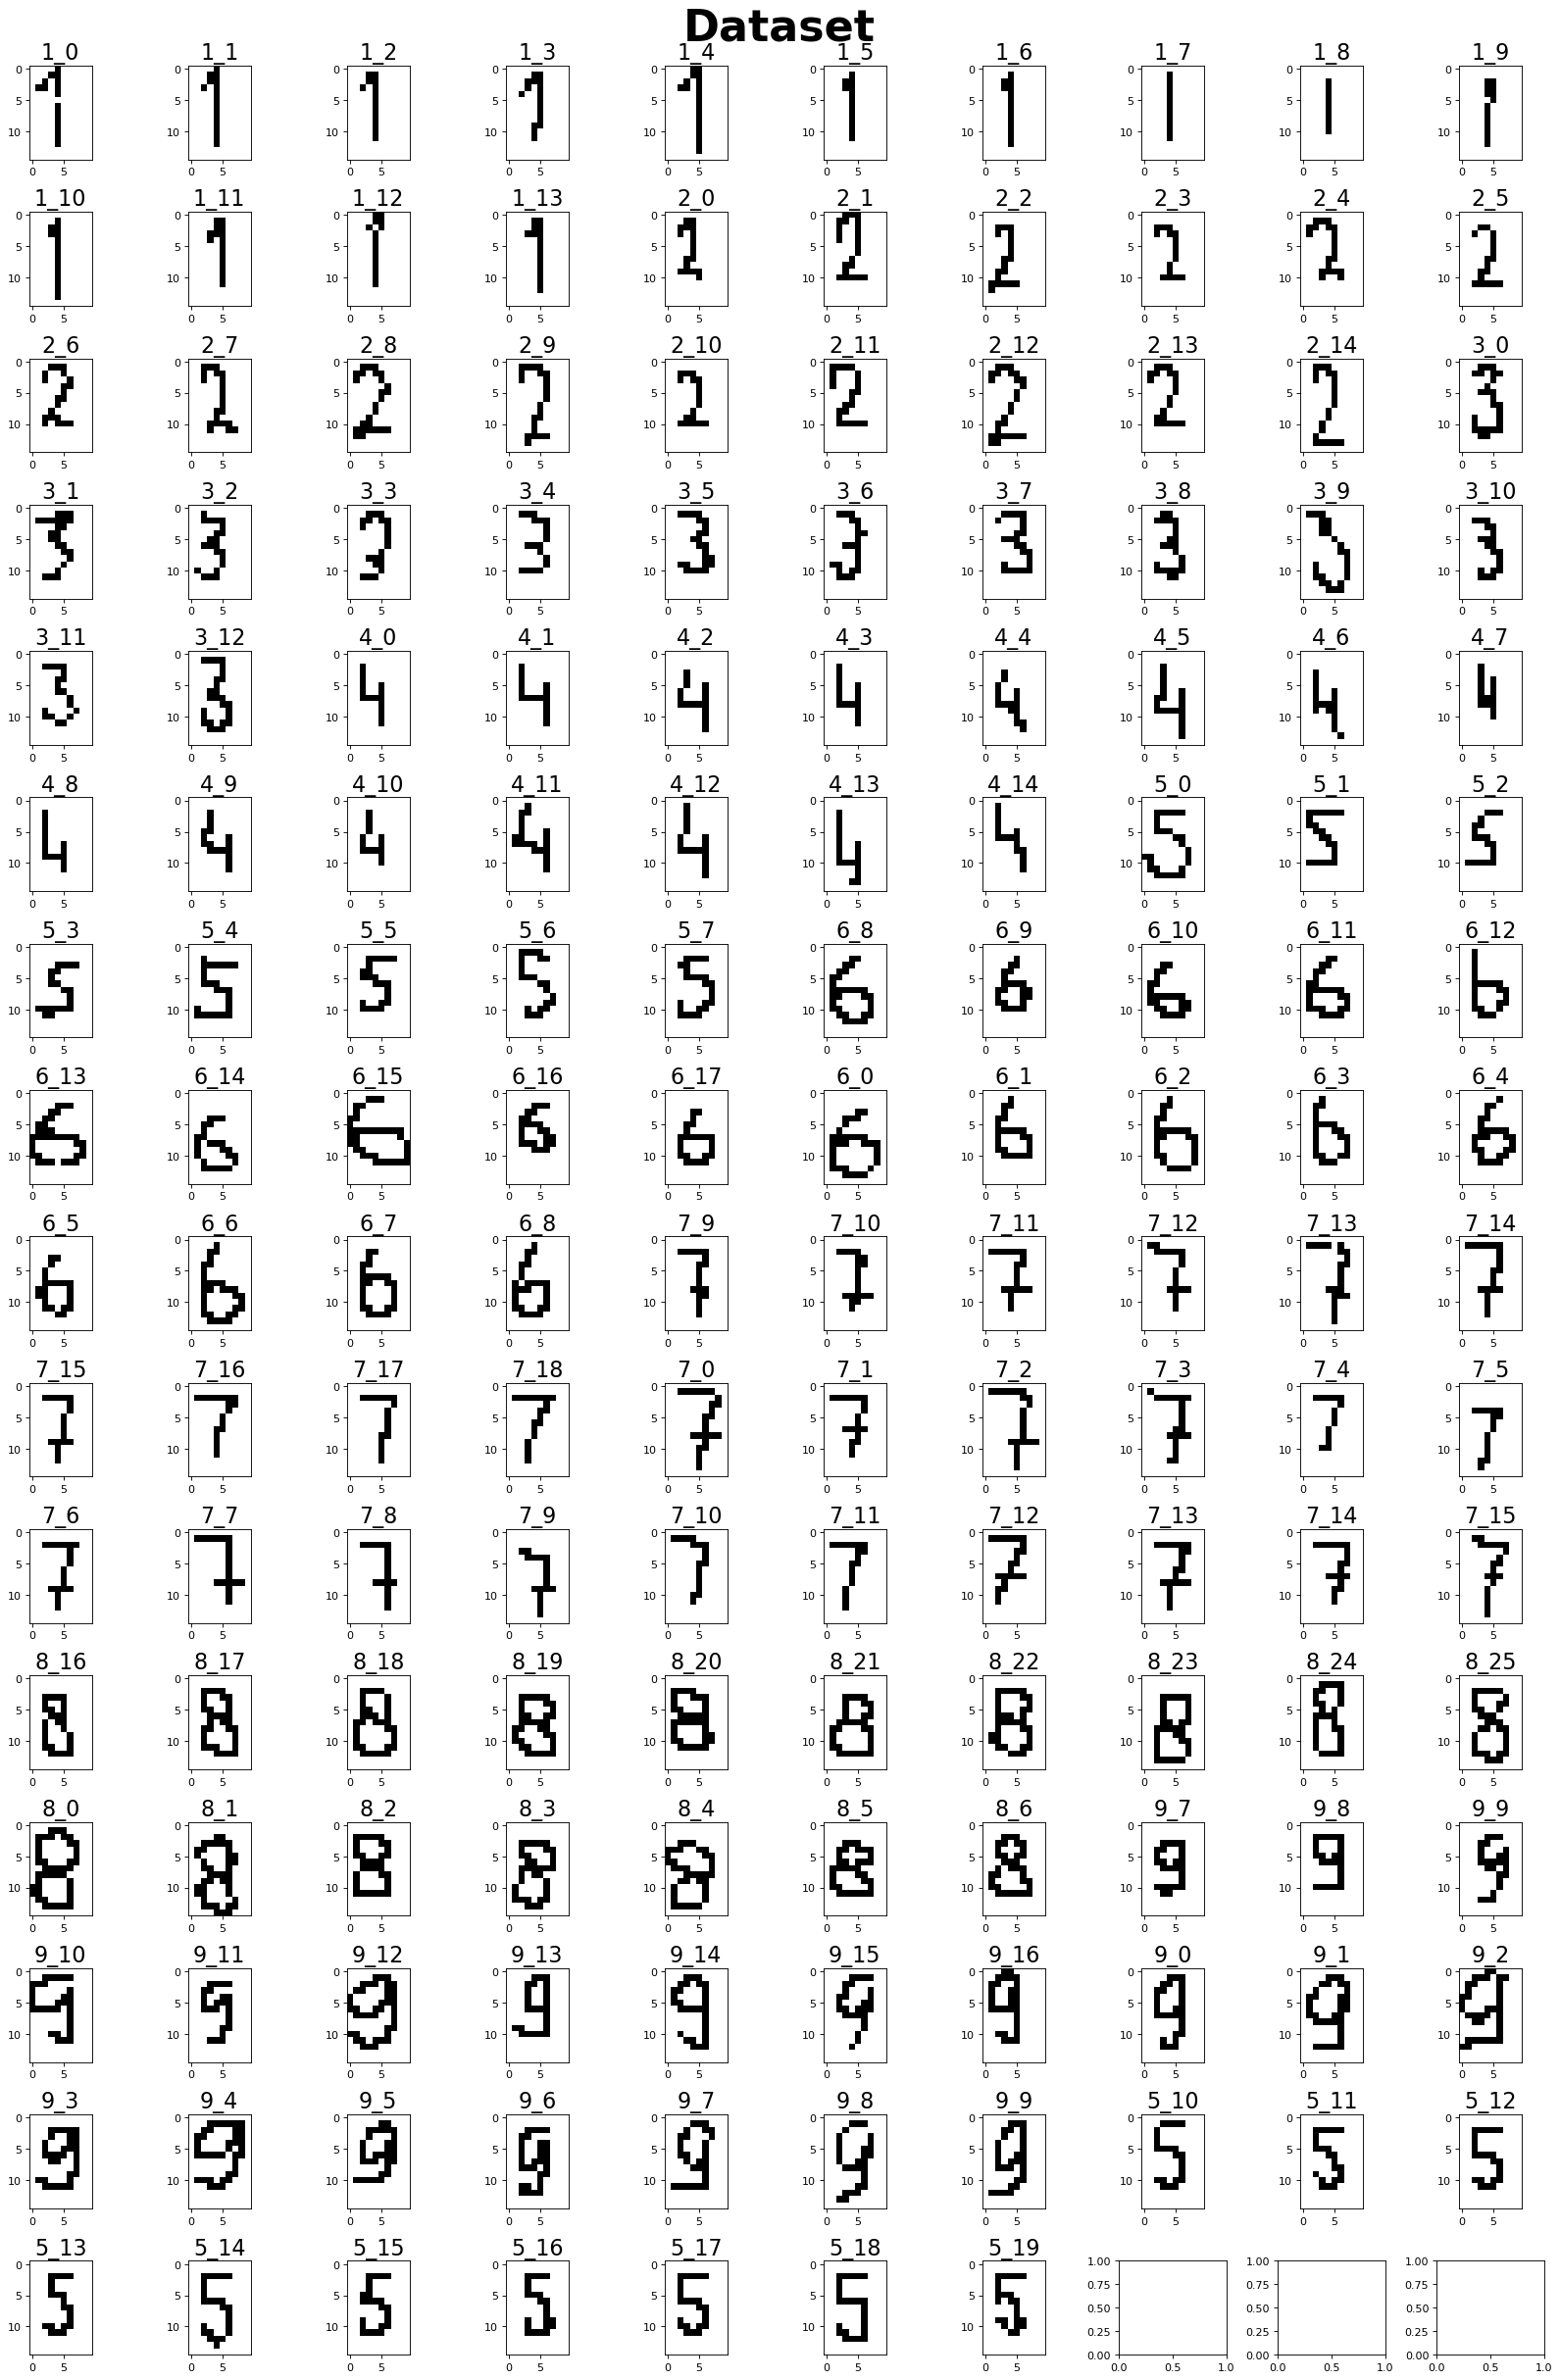

In [3]:
fig, axs = plt.subplots(nrows=16,
                        ncols=10,
                        #sharex=True,
                        #sharey=True,
                        figsize=(20, 30),
                        dpi=80)

for ax, row, label in zip(axs.flat, data, labels):
    reshaped_row = row.reshape(15,10)#TODO: Make this configurable
    #ax.imshow(reshaped_row, cmap=plt.cm.binary, interpolation='gaussian')
    ax.imshow(reshaped_row, cmap=plt.cm.binary, interpolation=None)
    ax.set_title(str(label), fontsize=20)
    firstTime=False

plt.suptitle('Dataset', fontsize=40, weight='bold', x=0.5, y=1.01)
plt.tight_layout(pad=1)
plt.show()

In [223]:
import math

number_of_columns = 150
number_of_rows = 150

som = somoclu.Somoclu(number_of_columns, number_of_rows, maptype='planar', kerneltype=0, verbose=2)

#som.view_activation_map()
#som.view_component_planes()
#som.view_similarity_matrix()
#som.view_umatrix()

In [224]:
%time som.train(np.float32(data), epochs=10, scale0=1, scaleN=0.1)

CPU times: user 42.3 s, sys: 830 ms, total: 43.1 s
Wall time: 22.6 s


In [225]:
def getColors():
    colors = list()

    for label in labels:
        colors.append(int(label[0]))
    return colors

<IPython.core.display.Javascript object>


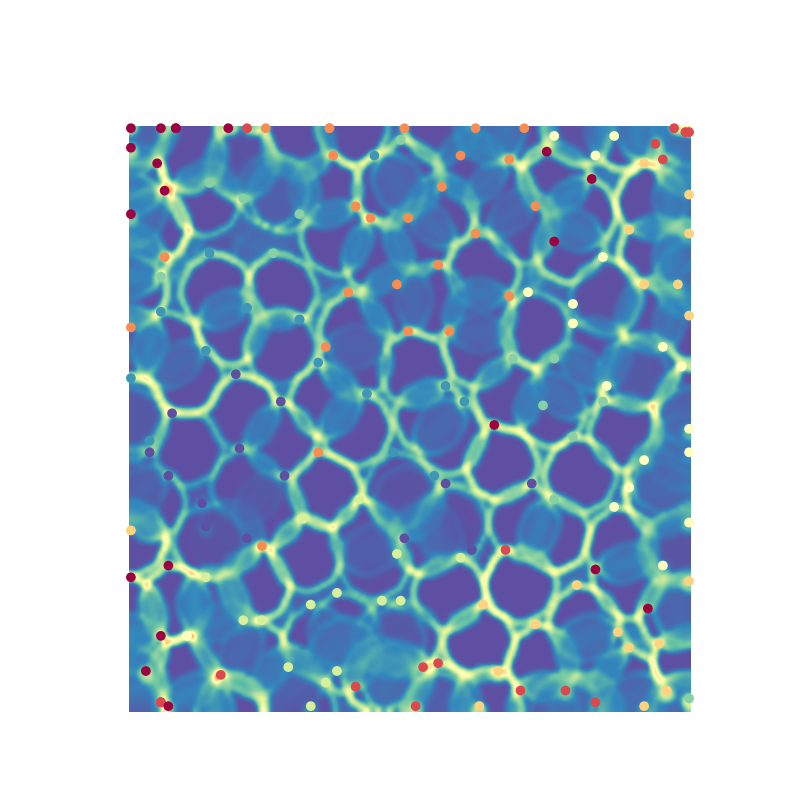

6

In [226]:
%matplotlib notebook

# Unified distance matrix
som.view_umatrix(bestmatches=True, bestmatchcolors=getColors(),  filename="output.svg") #labels=labels,

def getBmu():
    for bmu in getBmuIndexes():
        return bmu.tolist()

def getBmuIndexes():
    return som.get_bmus(som.get_surface_state());

annotation = plt.gca().annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annotation.set_visible(False)

def hover(event):
    visible = annotation.get_visible()
    
    x = int(np.rint(event.xdata))
    y = int(np.rint(event.ydata))
    
    i = 0
    for bmu in getBmuIndexes():
        x_2, y_2 = bmu.tolist()
        
        if x == x_2 and y == y_2:
            annotation.xy = (x,y)
#            annotation.set_x(100)
#            annotation.set_y(-100)
            annotation.get_bbox_patch().set_alpha(0.4)
            annotation.set_visible(True)
            plt.gcf().canvas.draw_idle()
            
            text = "TESTING x = "
            text += str(x)
            text += " y = "
            text += str(y)
            text += " "

            annotation.set_text(text + labels[i])
    
            return
        i+=1
    if visible:
        annotation.set_visible(False)
        plt.gcf().canvas.draw_idle()

plt.gcf().canvas.mpl_connect("motion_notify_event", hover)